In [32]:
# Dependencies
# ----------------------------------
# Imports the method used for connecting to DBs
from sqlalchemy import create_engine

# Imports the methods needed to abstract classes into tables
from sqlalchemy.ext.declarative import declarative_base

# Allow us to declare column types
from sqlalchemy import Column, Integer, String, Float, ForeignKey, Table 

from sqlalchemy.orm import relationship

# Pandas
import pandas as pd

# plotting
import matplotlib.pyplot as plt




In [33]:
# Set up the engine and connection...
# Get the password securely
password=input('please input password for database connection')
connectstring='postgresql+psycopg2://postgres:'+ password + '@localhost:5432/sql-challenge'

engine = create_engine(connectstring) 
conn = engine.connect()  

In [34]:
# Create a "Metadata" Layer That Abstracts our SQL Database
# ----------------------------------
# Use this to clear out the db
# ----------------------------------
Base.metadata.drop_all(engine)

# Create (if not already in existence) the tables associated with our classes.
Base.metadata.create_all(engine)

# Create a Session Object to Connect to DB
# ----------------------------------
# Session is a temporary binding to our DB
from sqlalchemy.orm import Session
session = Session(bind=engine)

In [35]:
# verify capability read / get all rows into pandas from all tables in the sql-challenge database 
department_pd = pd.read_sql("SELECT * FROM department", conn)
department_employee_pd = pd.read_sql("SELECT * FROM department_employee", conn)
department_manager_pd =  pd.read_sql("SELECT * FROM department_manager", conn)
title_pd =  pd.read_sql("SELECT * FROM title", conn)
salary_pd =  pd.read_sql("SELECT * FROM salary", conn)
employee_pd =  pd.read_sql("SELECT * FROM employee", conn)
# check that all tables completely loaded
print(department_pd.count())
print(department_employee_pd.count())
print(department_manager_pd.count())
print(title_pd.count())
print(salary_pd.count())
print(employee_pd.count())


department_number    9
department_name      9
dtype: int64
employee_number      331603
department_number    331603
dtype: int64
department_number    24
employee_number      24
dtype: int64
title_id    7
title       7
dtype: int64
employee_number    300024
salary             300024
dtype: int64
employee_number      300024
employee_title_id    300024
birth_date           300024
first_name           300024
last_name            300024
gender               300024
hire_date            300024
dtype: int64


In [36]:
# select the salary info from the salary table
salaries_pd =  pd.read_sql("Select Salary from Salary", conn)
salaries_pd.count()

salary    300024
dtype: int64

Histogram Chart of Salaries using Pandas:



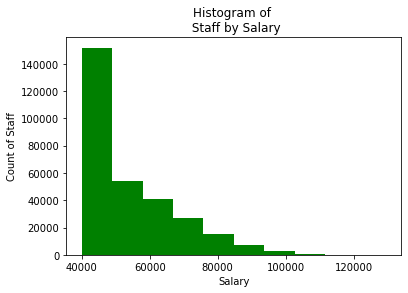

In [53]:
# plot a histogram of the salaries
salaries_pd.salary.plot(kind='hist',color='g', align="mid",title="Histogram of \n Staff by Salary")
plt.ylabel("Count of Staff")
plt.xlabel("Salary")
print(f"Histogram Chart of Salaries using Pandas:\n")
plt.show()

In [48]:
# select the salary info by title from the employee, title and salary tables
title_salaries_pd =  pd.read_sql("Select t.Title, avg(s.Salary) \
from Employee e, Salary s, Title t \
where e.Employee_Number = s.Employee_Number \
and t.title_id = e.employee_title_id \
Group By t.title", conn)



In [49]:
title_salaries_pd

,title,avg
0,Assistant Engineer,48564.434447
1,Engineer,48535.336511
2,Manager,51531.041667
3,Senior Engineer,48506.799871
4,Senior Staff,58550.172704
5,Staff,58465.382850
6,Technique Leader,48582.896092


Bar Chart of Average Salary by Title using Pandas:



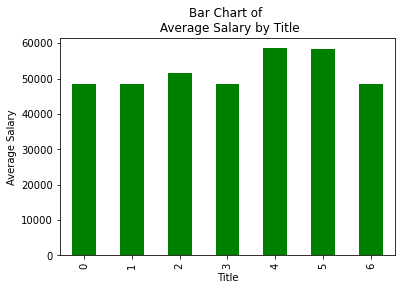

In [58]:
# plot a bar of the average salary by title
title_salaries_pd.avg.plot(kind='bar',x="title", color='g', align="center",title="Bar Chart of \n Average Salary by Title")
plt.ylabel("Average Salary")
plt.xlabel("Title")
print(f"Bar Chart of Average Salary by Title using Pandas:\n")
plt.show()

Bar Chart of Salaries using Pandas:



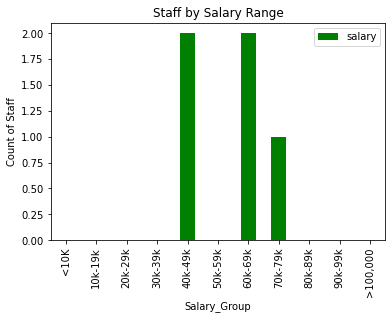

In [47]:
salaries_pd.count()

salary          300024
Salary_Group         5
dtype: int64

Bar Chart of Salaries using Pandas:



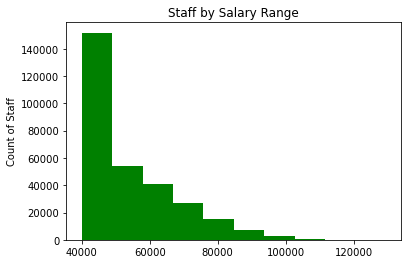